In [3]:
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [4]:
data=pd.read_csv("C:\\Users\\channu\\Downloads\\forestfires (1).csv")

In [5]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [7]:
data.shape

(517, 31)

In [8]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [10]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
import seaborn as sns 

<AxesSubplot:>

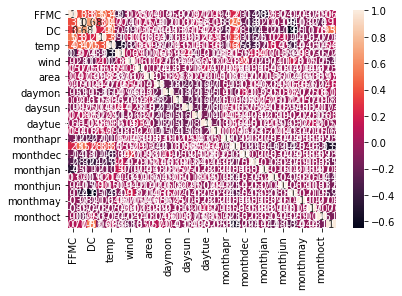

In [13]:
sns.heatmap(data.corr(),annot=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [16]:
data1=data.astype({'size_category':'category'})
df=data1.drop(['month','day'],axis=1)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [17]:
x=df.drop('size_category',axis=1)
y=data['size_category']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [21]:
#kernal linear 
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
y_pred=svclassifier.predict(x_test)

In [23]:
y_pred

array(['large', 'small', 'small', 'large', 'large', 'large', 'small',
       'large', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'large', 'large', 'large', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'large', 'large', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'large', 'large',
       'large', 'large', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'large', 'large', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'large', 'large', 'large', 'large',
       'small', 'sma

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[33  2]
 [ 1 68]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       large       0.97      0.94      0.96        35
       small       0.97      0.99      0.98        69

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104



In [26]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='rbf')
svclassifier.fit(x_train,y_train)

SVC()

In [27]:
y_pred=svclassifier.predict(x_test)

In [28]:
y_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'sma

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 1 34]
 [ 0 69]]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       large       1.00      0.03      0.06        35
       small       0.67      1.00      0.80        69

    accuracy                           0.67       104
   macro avg       0.83      0.51      0.43       104
weighted avg       0.78      0.67      0.55       104



In [31]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='sigmoid')
svclassifier.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [32]:
y_pred=svclassifier.predict(x_test)

In [33]:
y_pred

array(['large', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'large', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'small', 'large', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'sma

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 8 27]
 [11 58]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       large       0.42      0.23      0.30        35
       small       0.68      0.84      0.75        69

    accuracy                           0.63       104
   macro avg       0.55      0.53      0.52       104
weighted avg       0.59      0.63      0.60       104



In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [37]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='poly')
svclassifier.fit(x_train,y_train)

SVC(kernel='poly')

In [38]:
y_pred=svclassifier.predict(x_test)

In [39]:
y_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small'], dtype=object)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 5  9]
 [ 0 38]]


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       large       1.00      0.36      0.53        14
       small       0.81      1.00      0.89        38

    accuracy                           0.83        52
   macro avg       0.90      0.68      0.71        52
weighted avg       0.86      0.83      0.80        52

